In [18]:
# Esercizio Sul database titanic, effettuiamo le seguenti analisi

import os
import dotenv
import sqlalchemy
import pandas as pd

# Load environment variables from .env file
dotenv.load_dotenv(override=True, dotenv_path=".env")

# Get database credentials from environment variables
username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

# Build the connection string
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"

# Create SQLAlchemy engine
db_engine = sqlalchemy.create_engine(conn_string)

# Define the query
query = "SELECT * FROM titanic"

# Execute the query and load the result into a DataFrame
db = pd.read_sql(query, con=db_engine)
db = pd.DataFrame(db)
# Display the DataFrame
print(db)


      PassengerId  PClass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
...           ...     ...                                                ...   
1304         1305       3                                 Spector, Mr. Woolf   
1305         1306       1                       Oliva y Ocana, Dona. Fermina   
1306         1307       3                       Saether, Mr. Simon Sivertsen   
1307         1308       3                                Ware, Mr. Frederick   
1308         1309       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch       

In [19]:
db.columns

Index(['PassengerId', 'PClass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'EmbarkDate'],
      dtype='object')

In [20]:
# Quanti ponti c'erano sulla nave? 
db.Cabin.unique()

array(['', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       

In [21]:
db['Ponte'] = db['Cabin'].str[0]

unique = db['Ponte'].dropna().unique()
unique = sorted(unique)

print(f"I ponti identificati sono: {unique}")

I ponti identificati sono: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


C:\Users\samee\AppData\Local\Temp\ipykernel_89864\1937106579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_count.index, y=class_count.values, palette="viridis")


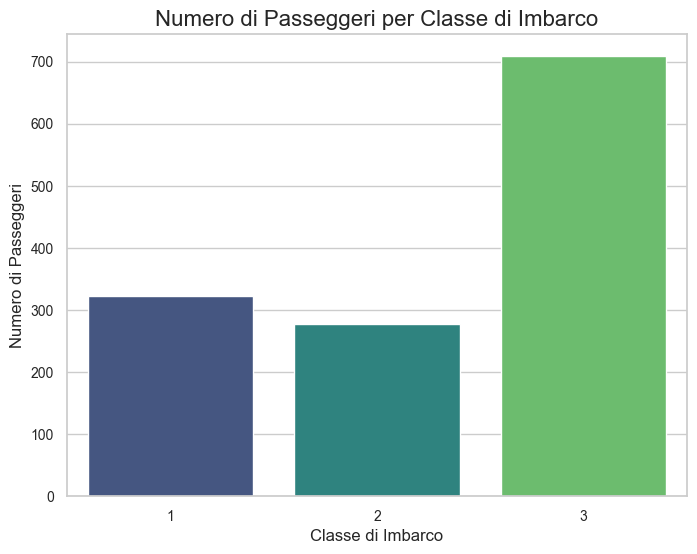

In [22]:
# • Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco 
import matplotlib.pyplot as plt
import seaborn as sns

class_count = db['PClass'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_count.index, y=class_count.values, palette="viridis")
plt.title("Numero di Passeggeri per Classe di Imbarco", fontsize=16)
plt.xlabel("Classe di Imbarco", fontsize=12)
plt.ylabel("Numero di Passeggeri", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [23]:
# • Fare la stessa cosa per la colonna alive 
db['Survived'].value_counts()



Survived
0    821
1    488
Name: count, dtype: int64

C:\Users\samee\AppData\Local\Temp\ipykernel_89864\984752424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alive_count.index, y=alive_count.values, palette="viridis")


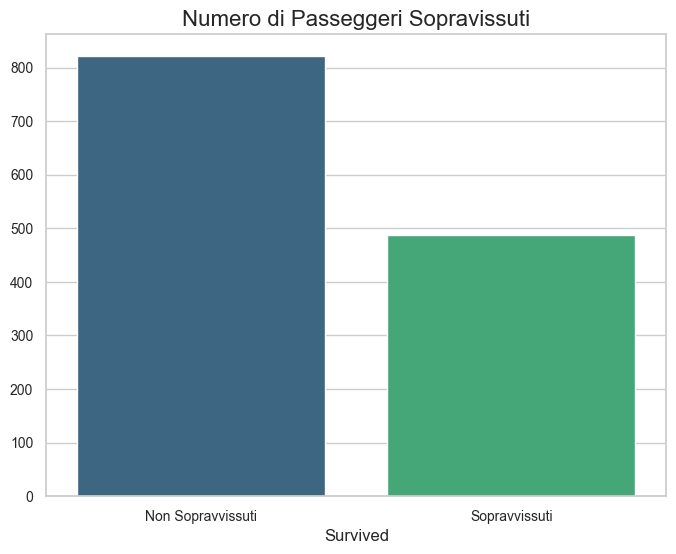

In [24]:
alive_count = db['Survived'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=alive_count.index, y=alive_count.values, palette="viridis")
plt.title("Numero di Passeggeri Sopravissuti", fontsize=16)
plt.xticks(ticks=[0, 1], labels=["Non Sopravvissuti", "Sopravvissuti"], fontsize=10)
plt.yticks(fontsize=10)
plt.show()




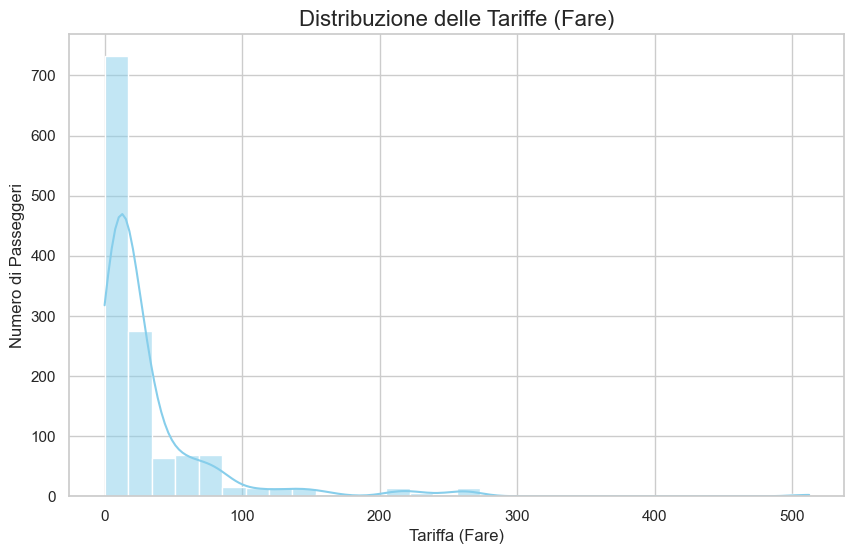

In [25]:
# • Qual era la distribuzione delle tariffe (fare)? 
sns.set(style="whitegrid")

# Crea un grafico a distribuzione per la colonna 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(data=db, x='Fare', kde=True, color='skyblue', bins=30)   # kde Kernel Density Estimation (stima della densità del kernel)

# Personalizza il grafico
plt.title("Distribuzione delle Tariffe (Fare)", fontsize=16)
plt.xlabel("Tariffa (Fare)", fontsize=12)
plt.ylabel("Numero di Passeggeri", fontsize=12)
plt.show()

C:\Users\samee\AppData\Local\Temp\ipykernel_89864\596711731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PClass', y='Age', data=db, palette="Set2")
C:\Users\samee\AppData\Local\Temp\ipykernel_89864\596711731.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PClass', y='Age', data=db, palette="muted")


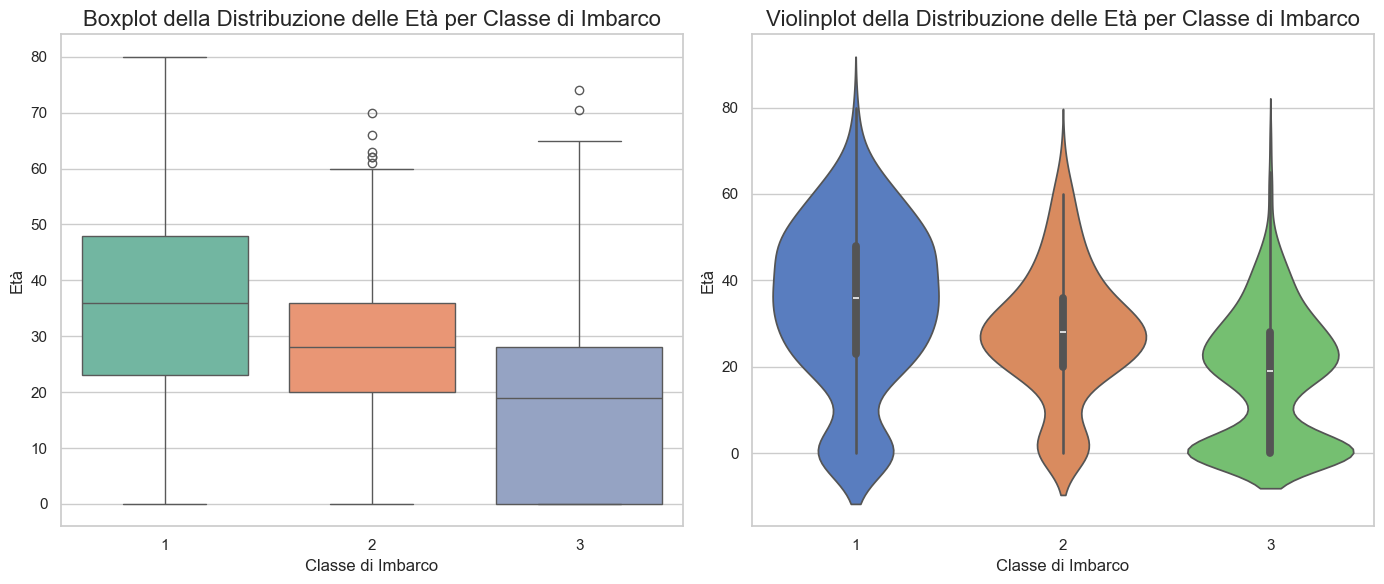

In [29]:
# • Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con un violinplot 
# Crea un boxplot per la distribuzione delle età rispetto alla classe di imbarco
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='PClass', y='Age', data=db, palette="Set2")
plt.title("Boxplot della Distribuzione delle Età per Classe di Imbarco", fontsize=16)
plt.xlabel("Classe di Imbarco")
plt.ylabel("Età")

# Crea un violinplot per la distribuzione delle età rispetto alla classe di imbarco
plt.subplot(1, 2, 2)
sns.violinplot(x='PClass', y='Age', data=db, palette="muted")
plt.title("Violinplot della Distribuzione delle Età per Classe di Imbarco", fontsize=16)
plt.xlabel("Classe di Imbarco")
plt.ylabel("Età")

# Mostra i grafici
plt.tight_layout()
plt.show()

C:\Users\samee\AppData\Local\Temp\ipykernel_89864\4089231532.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=db, palette="Set3")


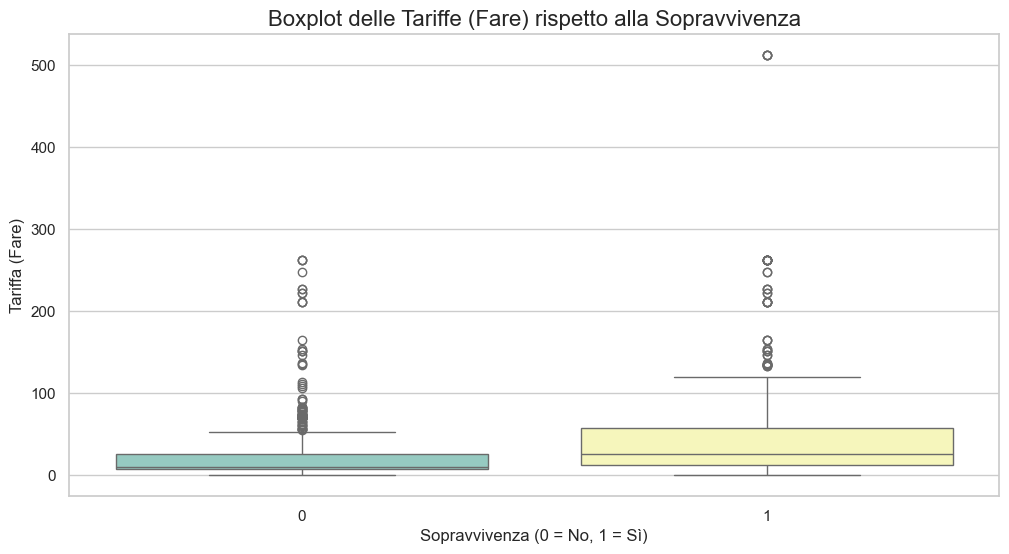

In [27]:
# • Visualizziamo un boxplot rispetto alle colonne fare e survived; che cose ne deduciamo?

sns.set(style="whitegrid")

# Crea un boxplot per confrontare 'Fare' e 'Survived'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Fare', data=db, palette="Set3")

# Personalizza il grafico
plt.title("Boxplot delle Tariffe (Fare) rispetto alla Sopravvivenza", fontsize=16)
plt.xlabel("Sopravvivenza (0 = No, 1 = Sì)")
plt.ylabel("Tariffa (Fare)")

# Mostra il grafico
plt.show()

In [28]:
# Esercizio Scarichiamo il dataset stockdata.csv da https://github.com/plotly/datasets/blob/master/stockdata.csv e: 
# • Visualizziamo l'andamento delle azioni della Apple ("AAPL") 
# • Visualizziamo l'andamento di tutte le azioni del dataset 
# • Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013 
# • Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso
